# Bank Marketing Campaign- Predicting Term Deposit (CRISP-DM)

## Problem Definition:

* One of the most common marketing strategy In Banking sector is direct marketing campaigns through phone calls ,it is a form of advertising that allows organizations to communicate directly with customers to offer their services based on the client’s existing bank profile .Here we will consider term deposit as a banking service .

### Direct marketing has significant challenges:

* The increasing number of marketing campaigns over time has reduced their effects on the general public.
* According to study positive response rates of direct marketing tend to be around 1-3%
* Startegy like Telemarketing may have high financial and resource costs, but less ROI
* Many people find direct marketing annoying and intrusive.
* If we reach a consumer who isn't interested in services, they are likely to find it irritating and this can create a negative brand association.

# Business Goal :
#### To build a list of target customers who are likey to subscribe a term deposit. The more targeted our campaigns, the more successful they are likely to be.

## Project Objective :
#### We will convert this problem into a machine learning classification problem . We will build a model to predict whether a client will subscribe a term deposit or not so that the banks can arrange a better management of available resources by focusing on the potential customers “predicted” by the classifier .This will help them to design a more efficient and precise campaign strategy to reduce the costs,improve the profits and customer satisfaction .

## Exploratory Data Analysis

In [4]:
import pandas as pd    
import seaborn as sns     
import numpy as np        
import matplotlib.pyplot as plt     
#from scipy import stats

In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [6]:
from google.colab import files
uploaded = files.upload()

Saving bank-additional-full.csv to bank-additional-full (1).csv


In [7]:
df=pd.read_csv('bank-additional-full.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [9]:
df.shape

(41188, 21)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [11]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [12]:
# no null value present in the data set

In [13]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [14]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [15]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [16]:
# renameing 'y' as 'target'

In [17]:
df=df.rename(columns={'y':'target'})

In [18]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [19]:
df.target.value_counts()

no     36548
yes     4640
Name: target, dtype: int64

## Visualizing Categorical Variables

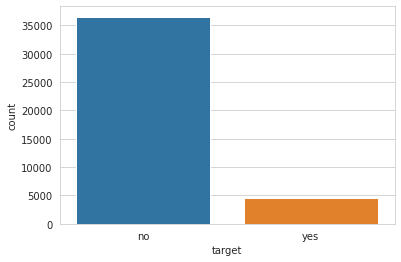

In [20]:
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
sns.countplot(x='target',data=df)

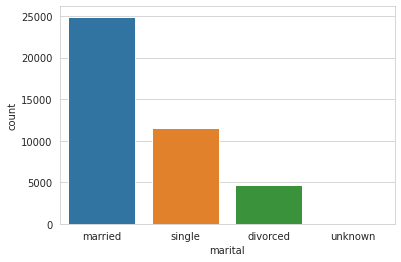

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x='marital',data=df)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

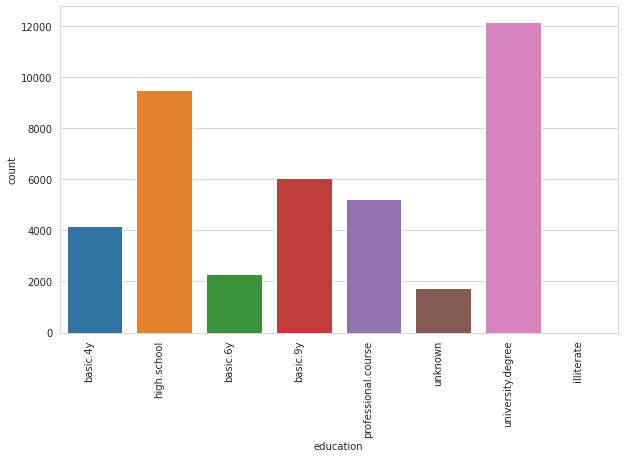

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x='education',data=df)
plt.xticks(rotation=90, horizontalalignment='right')

In [23]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

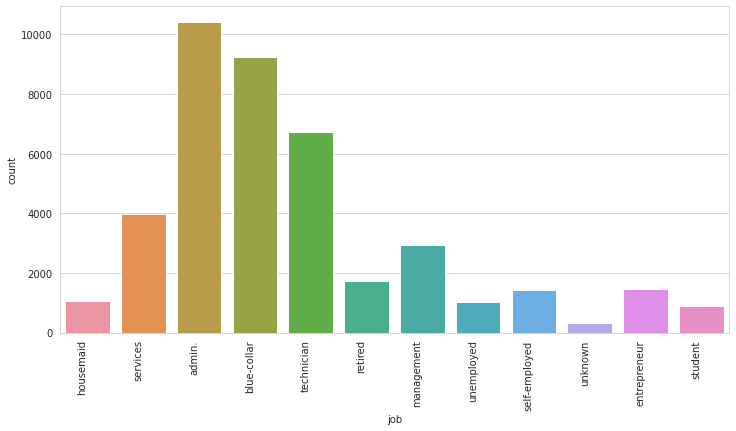

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(x="job",data=df)
plt.xticks(rotation=90, horizontalalignment='right')

Text(0.5, 0, 'default')

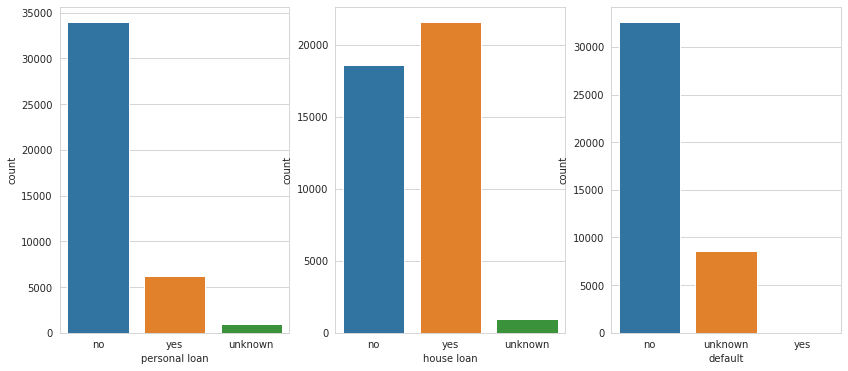

In [25]:
fig,(ax1,ax2,ax3) =plt.subplots(nrows = 1, ncols = 3,figsize=(14,6))
sns.countplot(x="loan",data=df,ax=ax1)
ax1.set_xlabel('personal loan')
sns.countplot(x="housing",data=df,ax=ax2)
ax2.set_xlabel('house loan')
sns.countplot(x="default",data=df,ax=ax3)
ax3.set_xlabel('default')

Text(0.5, 0, 'previous outcome')

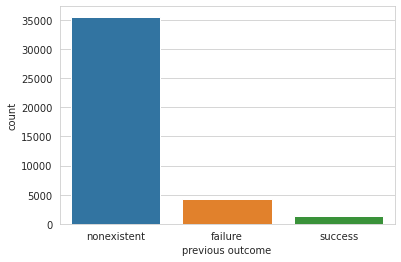

In [26]:
fig,ax=plt.subplots()
sns.countplot(x="poutcome",data=df)
ax.set_xlabel('previous outcome')

Text(0.5, 0, 'contcat type')

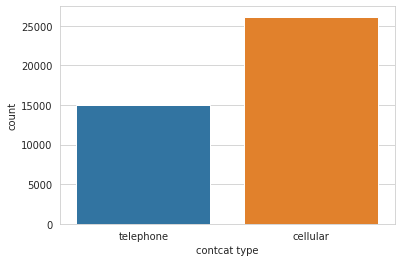

In [27]:
fig,ax=plt.subplots()
sns.countplot(x="contact",data=df)
ax.set_xlabel("contcat type")

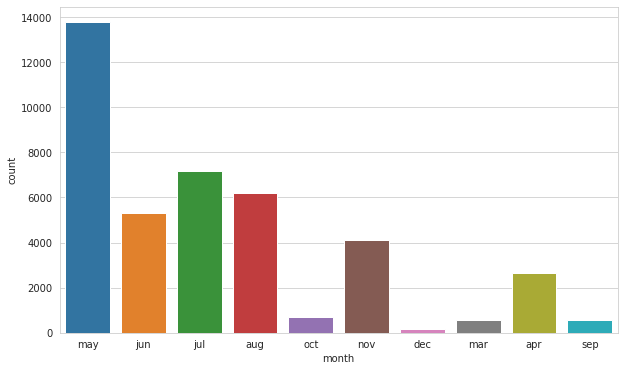

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(x="month",data=df)

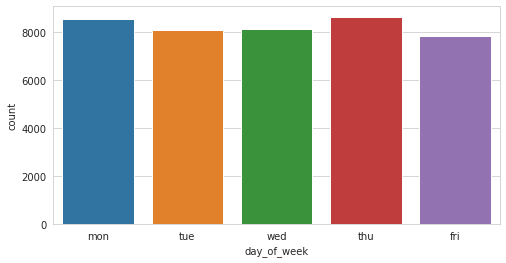

In [29]:
plt.figure(figsize=(8,4))
sns.countplot(x="day_of_week",data=df)

## Visualizing Numerical Variable

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


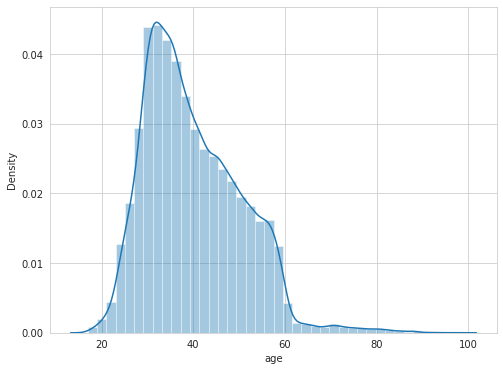

In [30]:
plt.figure(figsize=(8,6))
sns.distplot(df['age'],bins=40)

In [31]:
df['age'].describe()


count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

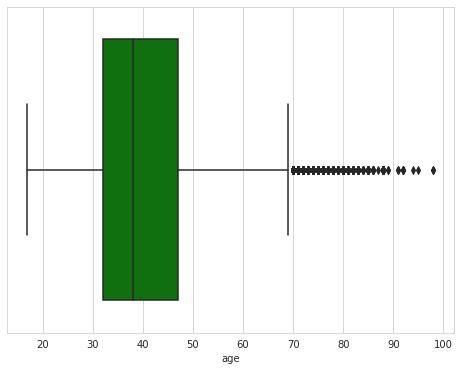

In [32]:
plt.figure(figsize=(8,6))
fig = sns.boxplot(x='age', data=df,color='green')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


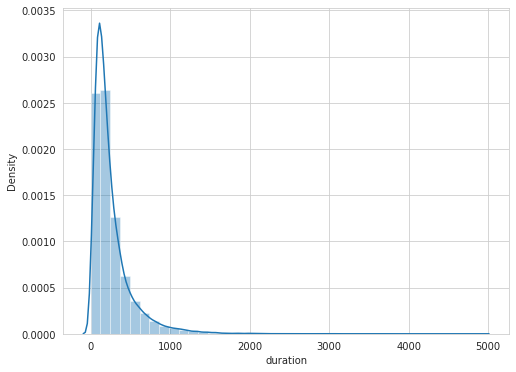

In [33]:
plt.figure(figsize=(8,6))
sns.distplot(df['duration'],bins=40)

In [34]:
df.duration.describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

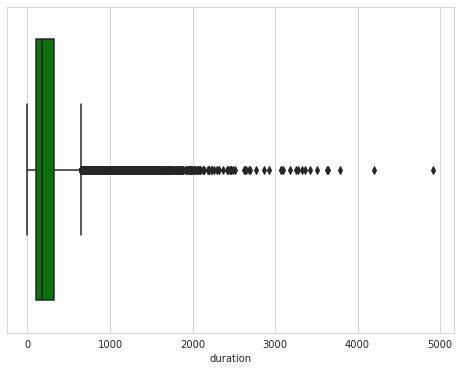

In [35]:
plt.figure(figsize=(8,6))
fig = sns.boxplot(x='duration', data=df,color='green')

In [36]:
#converting target variable in 0 for no and 1 for yes
df['target']=df['target'].replace({'no':0,'yes':1})

In [37]:
df["target"].value_counts()

0    36548
1     4640
Name: target, dtype: int64

In [38]:
## Bivariate Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

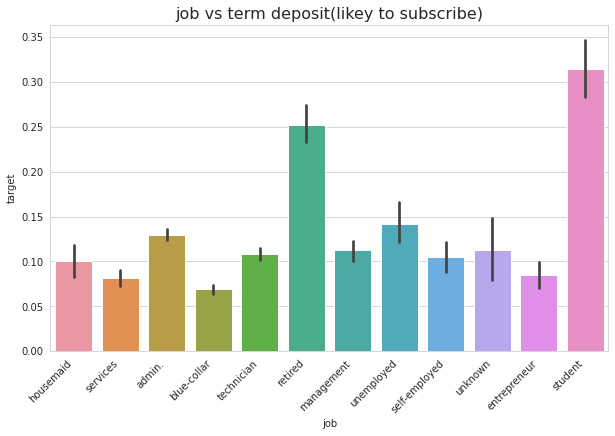

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='job', y='target', data=df)
plt.title('job vs term deposit(likey to subscribe)',fontsize=16)
plt.xticks(rotation=45, horizontalalignment='right')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

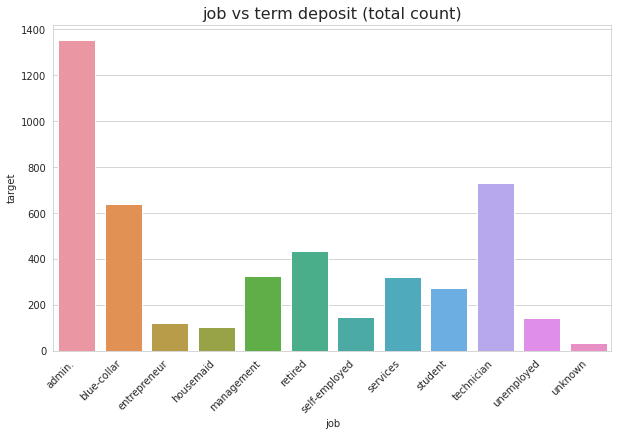

In [ ]:
df1 = df.groupby('job').agg({'target':'sum'})
plt.figure(figsize=(10,6))
sns.barplot(x = df1.index, y = df1.target, data = df1)
plt.title('job vs term deposit (total count)',fontsize=16)
plt.xticks(rotation=45, horizontalalignment='right')

In [ ]:
df.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

Text(0.5, 1.0, 'marital vs term deposit(likey to subscribe)')

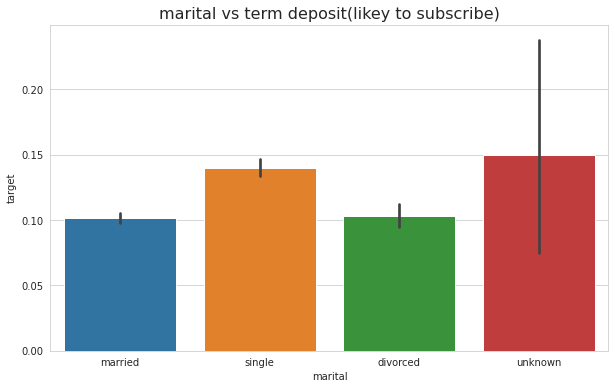

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='marital', y='target', data=df)
plt.title('marital vs term deposit(likey to subscribe)',fontsize=16)

Text(0.5, 1.0, 'marital vs term deposit (total count)')

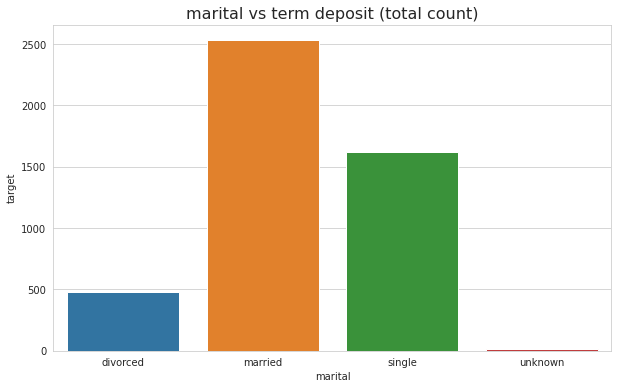

In [ ]:
df1 = df.groupby('marital').agg({'target':'sum'})
plt.figure(figsize=(10,6))
sns.barplot(x = df1.index, y = df1.target, data = df1)
plt.title('marital vs term deposit (total count)',fontsize=16)

In [ ]:
df["marital"].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

Text(0.5, 1.0, 'education vs term deposit(likey to subscribe)')

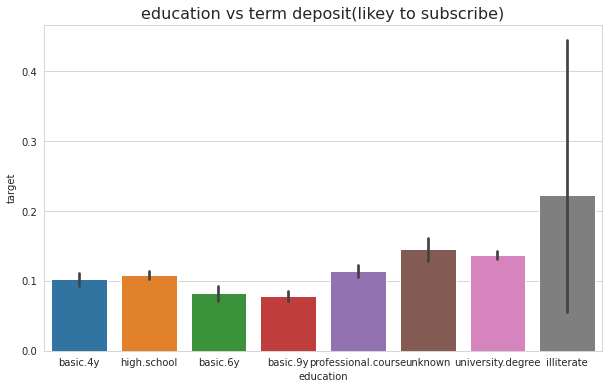

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='education', y='target', data=df)
plt.title('education vs term deposit(likey to subscribe)',fontsize=16)

In [55]:
df.loc[:, 'target'].groupby([df['education'],df['target']]).count()

education            target
basic.4y             0          3748
                     1           428
basic.6y             0          2104
                     1           188
basic.9y             0          5572
                     1           473
high.school          0          8484
                     1          1031
illiterate           0            14
                     1             4
professional.course  0          4648
                     1           595
university.degree    0         10498
                     1          1670
unknown              0          1480
                     1           251
Name: target, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

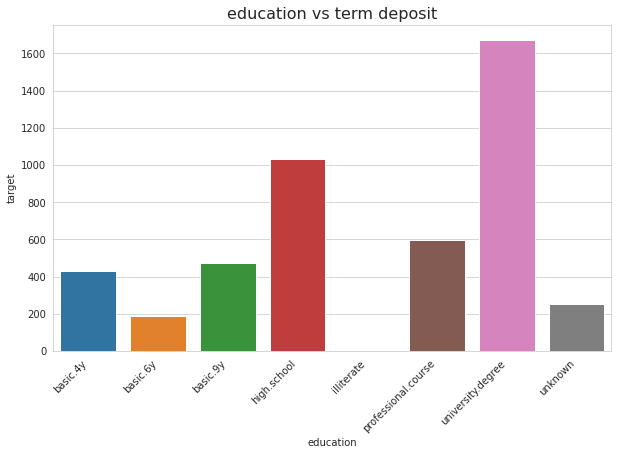

In [56]:
df1 = df.groupby('education').agg({'target':'sum'})
plt.figure(figsize=(10,6))
sns.barplot(x = df1.index, y = df1.target, data = df1)
plt.title('education vs term deposit',fontsize=16)
plt.xticks(rotation=45, horizontalalignment='right')

In [57]:
df["education"].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

Text(0.5, 1.0, 'month vs term deposit(likey to subscribe)')

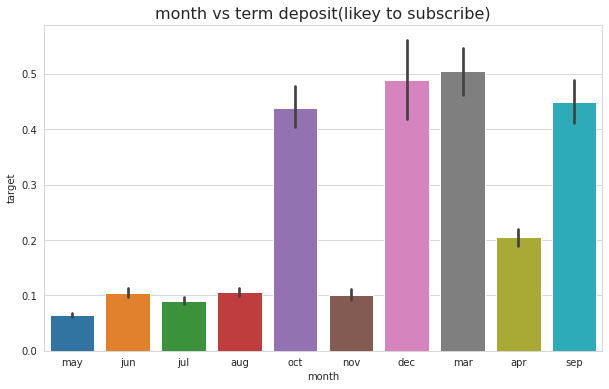

In [58]:
plt.figure(figsize=(10,6))
sns.barplot(x='month', y='target', data=df)
plt.title('month vs term deposit(likey to subscribe)',fontsize=16)

Text(0.5, 1.0, 'month vs term deposit (total)')

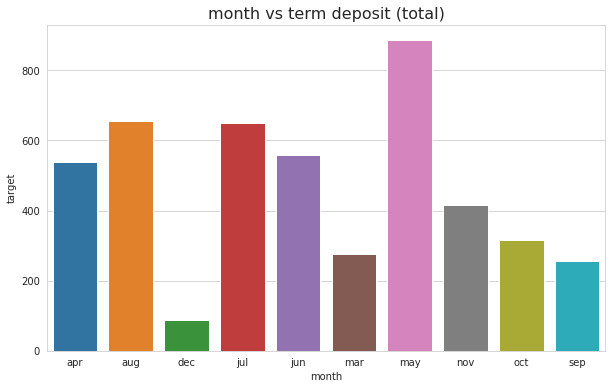

In [59]:
df1 = df.groupby('month').agg({'target':'sum'})
plt.figure(figsize=(10,6))
sns.barplot(x = df1.index, y = df1.target, data = df1)
plt.title('month vs term deposit (total)',fontsize=16)

In [60]:
df["month"].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

Text(0.5, 1.0, 'day_of_week vs term deposit(likey to subscribe)')

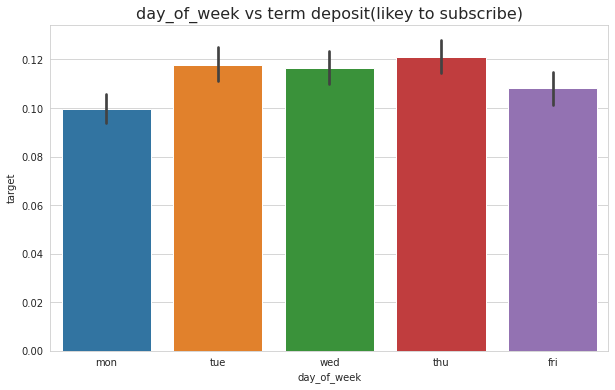

In [61]:
plt.figure(figsize=(10,6))
sns.barplot(x='day_of_week', y='target', data=df)
plt.title('day_of_week vs term deposit(likey to subscribe)',fontsize=16)

Text(0.5, 1.0, 'day_of_week vs term deposit (total)')

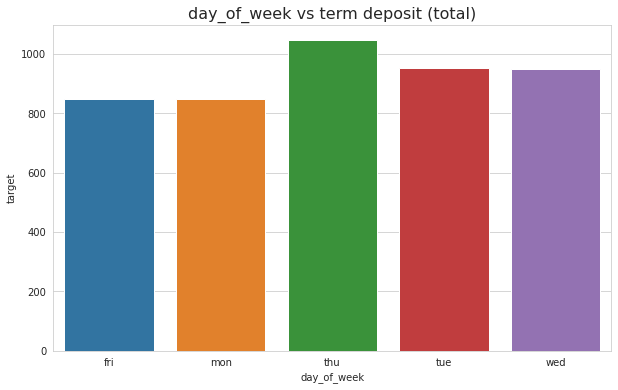

In [62]:
df1 = df.groupby('day_of_week').agg({'target':'sum'})
plt.figure(figsize=(10,6))
sns.barplot(x = df1.index, y = df1.target, data = df1)
plt.title('day_of_week vs term deposit (total)',fontsize=16)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Text(0.5, 1.0, 'correlation matrix for numerical variables')

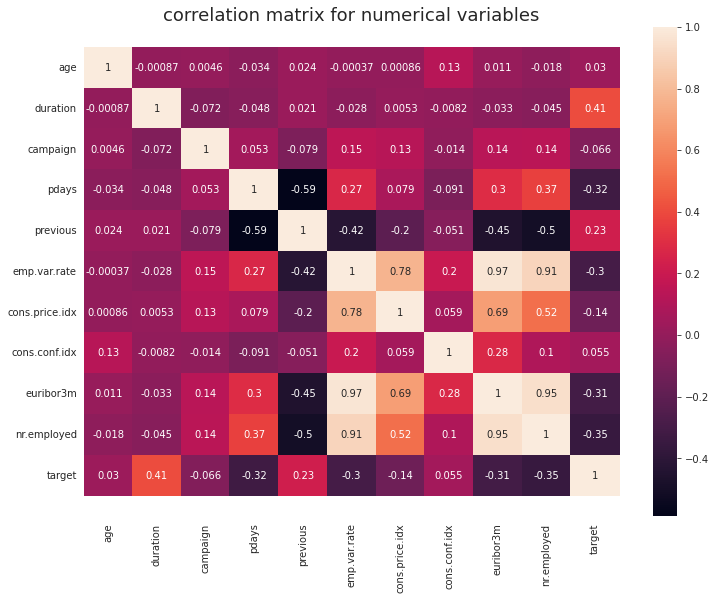

In [65]:
corrmat = df.corr()
fig, ax = plt.subplots(figsize=(12, 9))
ax = sns.heatmap(corrmat,annot=True,)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('correlation matrix for numerical variables',fontsize=18)

### Observations :
* 'emp.var.rate', 'cons.price.idx' , 'cons.conf.idx' , 'euribor3m' , and 'nr.employed' are highly correlated , we can not drop any of them without advise from domain expert.

### Data Preparation
#### We have to drop the 'duration' column beacuse the duration will be unknown before a call is performed so in training dataset we can not keep this, moreover after the the call anyhow the outcome will be known

In [66]:
df=df.drop('duration',axis=1)

In [67]:
df.shape

(41188, 20)

In [68]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'target'], dtype='object')

In [69]:
df.pdays.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [70]:
# in pdays 39673 values are 999 which means client was not previously contacted, and the range for other values is
# 3-27 and count is significantly low , now we can not keep this coulmn like this ,it will add bias to our model , 
#so we will convert this coulm as categorical column

In [71]:
df['pdays_cat'] =['cont' if each==999 else 'not_cont' for each in df.pdays]

In [72]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target,pdays_cat
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,cont
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,cont
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,cont
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,cont
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,cont


In [73]:
df.pdays_cat.value_counts()

cont        39673
not_cont     1515
Name: pdays_cat, dtype: int64

In [74]:
df=df.drop(['pdays'], axis=1)

In [75]:
df.shape

(41188, 20)

### separating categorical variable

In [76]:
cat_columns_df=df.select_dtypes(include=['object'])

In [77]:
cat_columns_df

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,pdays_cat
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,cont
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,cont
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,cont
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,cont
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,cont
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,cont
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,cont
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,cont
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,cont


In [78]:
### separating numerical value

In [79]:
num_columns_df=df.select_dtypes(exclude=['object'])

In [80]:
num_columns_df

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...
41183,73,1,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,2,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,1,0,-1.1,94.767,-50.8,1.028,4963.6,1


In [81]:
num_columns_df = num_columns_df.drop('target',axis=1)
num_columns_df.shape

(41188, 8)

In [82]:
num_columns_df.columns

Index(['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], dtype='object')

In [83]:
#creating test data set 
df_test=df.target.astype(dtype='bool')

In [84]:
df_test.shape

(41188,)

In [85]:
df_test.dtype

dtype('bool')

In [ ]:
### creating dummy variables form categorical varibales

In [86]:
dummy_columns_df=pd.get_dummies(cat_columns_df,drop_first=True)
dummy_columns_df.shape

(41188, 44)

In [87]:
### scaling numerical variables

In [89]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0,1))
num_columns_scaled_df=pd.DataFrame(scaler.fit_transform(num_columns_df),columns=num_columns_df.columns)

In [90]:
num_columns_scaled_df

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.481481,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
1,0.493827,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
2,0.246914,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
3,0.283951,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
4,0.481481,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735
...,...,...,...,...,...,...,...,...
41183,0.691358,0.000000,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000
41184,0.358025,0.000000,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000
41185,0.481481,0.018182,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000
41186,0.333333,0.000000,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000


#### Creating Train Data set

In [91]:
df_train = pd.concat([num_columns_scaled_df, dummy_columns_df], axis=1,sort=False)
df_train

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,pdays_cat_not_cont
0,0.481481,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,0.493827,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
2,0.246914,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3,0.283951,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,0.481481,0.000000,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.691358,0.000000,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
41184,0.358025,0.000000,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
41185,0.481481,0.018182,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
41186,0.333333,0.000000,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [93]:
df_train.shape

(41188, 52)

In [95]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_train,df_test,test_size=0.2,random_state=10)

In [96]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32950, 52)
(8238, 52)
(32950,)
(8238,)


#### Handling Imbalance Data

In [97]:
y_train.value_counts()

False    29238
True      3712
Name: target, dtype: int64

### We will use Random Oversampling technique to balance the data , this method randomly selectes examples from the minority class, with replacement, and adding them to the training dataset.¶


In [98]:
from imblearn.over_sampling import RandomOverSampler
RO = RandomOverSampler(sampling_strategy='minority')

In [99]:
X_train_os,y_train_os = RO.fit_resample(X_train,y_train)

In [100]:
X_train_os.shape,y_train_os.shape

((58476, 52), (58476,))

In [103]:
y_train.value_counts()

False    29238
True      3712
Name: target, dtype: int64

In [104]:
y_train_os.value_counts()

True     29238
False    29238
Name: target, dtype: int64

## Model and Evaluation
### Model used:

#### K-Nearest Neighbor
#### Decision Tree

### Evaluation metrics :

#### Accuracy Score
#### Precision Score
#### Recall Score
#### ROC AUC Score

### Evaluation method :
### As this is a classification problem we will mainly consider the ROC AUC score
### Satisfactory Recall Score : Our objective will be reducing False Negetive count,we can not miss out our potential customer ##

In [105]:
from sklearn import metrics 
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve,accuracy_score,precision_score, recall_score

In [106]:
def classification_metrics(x,y) :
    accuracy = metrics.accuracy_score(x,y)
    
    precision = metrics.precision_score(x,y)
    recall=metrics.recall_score(x,y)
    cm= metrics.confusion_matrix(x,y)
    
    print('accuracy score is :',accuracy )
    print('precision score is :',precision )
    print('recall score is :',recall )
    ax = sns.heatmap(cm,annot=True,cmap='plasma',fmt='g')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title('Confusion Matrix',fontsize=16)

In [107]:
## Knn Classifier

In [108]:
from  sklearn.neighbors import KNeighborsClassifier
scores = []
recall=[]
for k in range(1,25,2) :
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_os,y_train_os)
    y_pred=knn.predict(X_test)
    scores.append(metrics.recall_score(y_test,y_pred))
    recall.append(metrics.recall_score(y_test,y_pred))

Text(0, 0.5, 'Testing Accuracy')

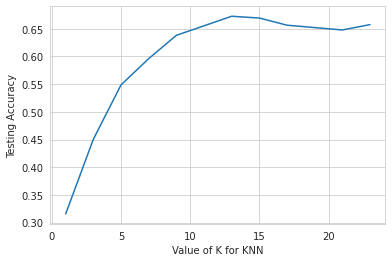

In [109]:
plt.plot(range(1,25,2), scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

accuracy score is : 0.7252974022821073
precision score is : 0.23710122095313116
recall score is : 0.6487068965517241


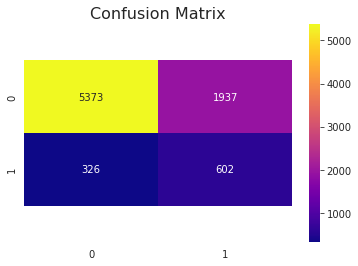

In [110]:
#will consider the optimun k value as 14 
knn=KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train_os,y_train_os)
y_predKNN=knn.predict(X_test)
classification_metrics(y_test,y_predKNN)

## Decision Tree Classifier

In [111]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(X_train_os,y_train_os)
y_predDT=DT.predict(X_test)

accuracy score is : 0.838553046856033
precision score is : 0.2985971943887776
recall score is : 0.32112068965517243


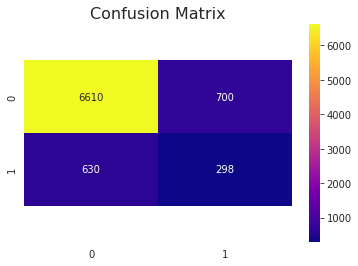

In [112]:
classification_metrics(y_test,y_predDT)


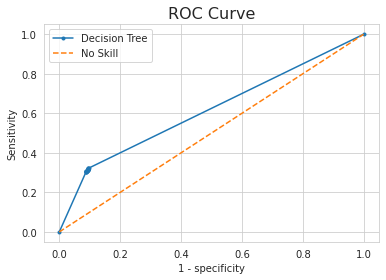

AUC ROC score is : 0.6126807278645219


In [113]:
DT_probs = DT.predict_proba(X_test)[:,1]
NS_probs = [0 for _ in range(len(y_test))]
dt_fpr, dt_tpr, _ = roc_curve(y_test, DT_probs)
ns_fpr, ns_tpr, ns_threshold = roc_curve(y_test, NS_probs)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.xlabel('1 - specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve',fontsize=16)
plt.legend()
plt.show()
print('AUC ROC score is :' ,metrics.roc_auc_score(y_test,y_predDT))